# Homework 2: Data Cleaning, EDA and Visualizations #

In [126]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [127]:
#import any libraries that you may need here
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### We would like our new consultants and mentors to not just be technically skilled but also ethical leaders in their fields. Therefore, let us go over some basic data ethics knowledge. ###

## Section 1: Data Ethics

### What are the different types of biases we mentioned during lecture? Pick one that you observe in yourself and describe how it may influence your decision-making.

In [128]:
# My perception of others and the world is sometimes influenced by unconscious bias.  For example, if someone tells me they go to a well-known or highly ranked school, 
# I assume that they are smart, but I don't have the same assumption when others tell me they go to juniot or community college. 
# However, just becuase someone attends a prestigous college does not neccesarrily mean that they are smart, and
# students at community colleges are not "dumber" than other students at better known universities. 

### How do you think you could overcome your biases? 

In [129]:
# I try to be more aware of my thoughts, and tell myself that measuring someone's intelligence based on the school they attend is not accurate or 
# represntative of someone's capabilities. I also recognize that everyone is multifaceated, and our abilities don't stem 
# from just one aspect such as education. 

### What is one example of how unethical data analysis impacted a group of people? Avoid repeating the lecture example. 

In [130]:
# In 2016, Danish researchers Emil Kirkegaard and Julius Daugbjerg-Bjerrekaer collected data from OkCupid using a bot profile. The researchers released information 
# about OkCupid users that included their age, gender, sexual orientation, and other personal responses on the Open Science Framework forum. 
# They argued that the data was already public, so their analysis was ethical. 
# However, just becuase some data is public, this does not mean that people feel comfortable having personal deatils be shared on an online forum.   

## Section 2: Data Cleaning

### Pick out a dataset that you are interested in working with on [Kaggle](https://www.kaggle.com/datasets)! You should continue working with it in future homeworks so that you have a comprehensive data science project by the end of the semester so pick a good one.
### Download it and add it to the same folder that you are working in so that you are able to load it easily. You can refer to the [slides](https://docs.google.com/presentation/d/1UPj0F_I0CYoiUrbuSR9sYq50FEh8-RDG4usnTFaUBJI/edit#slide=id.g1c0cc4ea8d8_0_1369) that we used for onboarding for any help. ###

In [131]:
# load your dataset here, df is short for DataFrame. 
# E.g.You can use pd.read_csv() for csv files. 
df = pd.read_csv("finaldata_episodes.csv")
df.head(5)

,season,episode,title,rdate,arate,arate_r,vcount
0,1,1,Extreme Aggressor,22.Sep.2005,7.8,8,3096
1,1,2,Compulsion,28.Sep.2005,7.6,8,2589
2,1,3,Won't Get Fooled Again,5.Oct.2005,7.6,8,2551
3,1,4,Plain Sight,12.Oct.2005,7.7,8,2331
4,1,5,Broken Mirror,19.Oct.2005,7.9,8,2411


####  Example

In [132]:
elections = pd.read_csv("elections.csv")
elections.head(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


### Now let's do some data cleaning! Here are a list of questions that you should think through and answer while looking at your data. If your data is from kaggle, it might already be really clean, but practise answering these questions. 

### *At this point, just answer these questions and examine your data but don't attempt to clean it yet* ###

- Does your data contain unrealistic or incorrect values?
    - Dates in the future
    - Locations that don’t exist
    - Negative counts
- Does your data violate obvious dependencies?
    - Age and birthday not matching
- Is the data coherent and consistent?
    - Misspellings and inconsistent labels
    - Was the data entered by hand?
- Are there signs of data falsification?
    - Repeated names, fake looking email addresses, uncommon names or fields
- Do we need to convert any of the variable types in order to prepare for modelling?
    - Qualitative variables that you might want to convert to numbers
- Any other interesting observations?

In [133]:
### Write your answers to each of the questions here 

# Q1: Does your data contain unrealistic or incorrect values?

# No, my data looks to be pretty organized: the columns are named in an understandble, straighforward manner, and all rows seem to be filled in. 

# Q2: Does your data violate obvious dependencies?

# No, my data does not violate obvious dependencies. 

# Q3: Is the data coherent and consistent?

# Yes, my data is coherent and consistent. For the most part, each feature is filled out for every row. 

# Q4: Are there signs of data falsification?

# The data doesn't specifiy where or how the rating was collected. In addition, the people who rated the TV show may not be a representation of all the population that do watch Criminal Minds. 

# Q5: Do we need to convert any of the variable types in order to prepare for modelling?

# I may want to convert the date into a different type. Right now, it is using both integers and strings. 

# Q6: Any other interesting observations?

# The dataset uses 11 seasons of the show, but there are currently 16 seasons. In addition, the number of people who voted inn the rating is different for every episode, which is interesting. 
# Is this because there are different people voting for each episode? 

In [134]:
# Any exploratory code here
# You can refer to the pandas section of the slides to do this
df.describe()

,season,episode,arate,arate_r,vcount
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,7.822823,11.426426,7.674474,7.678679,1858.840841
std,4.254178,6.649451,0.430442,0.539463,606.026215
min,1.000000,1.000000,6.600000,7.000000,242.000000
25%,4.000000,6.000000,7.400000,7.000000,1606.000000
50%,8.000000,11.000000,7.600000,8.000000,1872.000000
75%,11.000000,17.000000,7.900000,8.000000,2171.000000
max,16.000000,25.000000,9.100000,9.000000,3902.000000


### More factors to consider

Here is a list of a few more questions to consider while data cleaning! Answer them to get a deeper understanding of your data.

- Do any of the keys in each table reference each other?
    - Primary keys are the column or set of columns in a table that determine the values of the remaining columns
    - Foreign keys are the column or sets of columns that reference primary keys in other tables
    - Can we merge them tables?
- What does each field specify? 
    - What is the variable type? 
    - Qualitative(Ordinal and Nominal), Quantitative (Continuous and discrete)
    - String, integer, float, list, array etc.
- Granularity? What does each record represent? Are there aggregations?
- Where was this data collected from? What types of questions were asked to gather this data? How representative is it? When was it collected?
- Truncated data 
    - Check the platform that you are working on, does it limit your data size?
- Time zone inconsistencies
    - Convert to common timezone
- Duplicated records or fields -> eliminate carefully
- Spelling errors
- Units not specified or inconsistent
- Missing Data
- Redundant data
- Simplify 
    - Take one column
    - Combine multiple columns  into one
- Aggregation
    - groupby


In [135]:
### Your answers to each of the questions/ observations about each factor here 

# Q1: Do any of the keys in each table reference each other?

# In this dataset, there are multiple primary keys. Those features are: 'season', 'episode', and 'title'. These keys then influence the 'arate', 'arate_r', and 'vcount'.  

In [136]:
# Any exploratory code here. 
# You can refer to the pandas section of the slides to do this
print(df.columns) # column labels 
print(df.index) # row labels 
print(df.shape)
len(df)
print(df['season'].value_counts())
print(df['episode'].value_counts())
df.groupby('season')['arate'].agg('mean')


Index(['season', 'episode', 'title', 'rdate', 'arate', 'arate_r', 'vcount'], dtype='object')
RangeIndex(start=0, stop=333, step=1)
(333, 7)
4     25
6     24
7     24
8     24
9     24
2     23
5     23
10    23
1     22
11    22
12    22
13    22
3     20
14    15
15    10
16    10
Name: season, dtype: int64
1     16
2     16
3     16
4     16
5     16
6     16
7     16
8     16
9     16
10    16
15    14
14    14
13    14
12    14
11    14
16    13
17    13
18    13
19    13
20    13
21    12
22    12
23     8
24     5
25     1
Name: episode, dtype: int64


season
1     7.731818
2     7.947826
3     7.870000
4     7.948000
5     7.713043
6     7.641667
7     7.704167
8     7.616667
9     7.670833
10    7.491304
11    7.459091
12    7.386364
13    7.472727
14    7.566667
15    7.690000
16    8.030000
Name: arate, dtype: float64

## Addressing Missing Data/ Default Values

### As you cleaned your data, you may have observed missing data/ default values. Decide what to do with these values and explain your decision-making process.

Here are some methods to deal with missing values:
- Drop records with missing values
    - Check for biases induced by missing values - there may be trends in why something is missing
    - This requires domain knowledge to check for induced bias
- Imputation: Inferring missing values
    - Replace with average value (closest related subgroup mean)
    - Replace with a random value from the closest subgroup(Hot deck imputation) 
- Numerical: 
    - mean, mode, median
- Categorical
    - Mode, new category
- Directly model missing values during future analysis

In [137]:
#Any preliminary cleaning necessary to start dealing with missing values
df.dropna().head(5)
len(df)

333

In [138]:
#Code addressing missing values here e.g. df.dropna()
elections.dropna().head(5) #remove this line, this is just an example

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
1,1824,John Quincy Adams,Democratic-Republican,113142,win,42.789878
2,1828,Andrew Jackson,Democratic,642806,win,56.203927
3,1828,John Quincy Adams,National Republican,500897,loss,43.796073
4,1832,Andrew Jackson,Democratic,702735,win,54.574789


In [139]:
#Explain what types of missing values you found and the decisions you made in addressing them
#After I called dropna() on my dataframe, I checked the length, which was the same value as before. This means that there were no NaN values in the dataset. 

## Handling outliers

### Now let's handle any outliers. Same process as before!

Here are some methods to deal with handling outliers:
- Drop records with outliers
    - Check for biases induced by missing values - there may be trends in why something is missing
    - This requires domain knowledge to check for induced bias
- Replace, as with Inferring missing values
    - Typically with min or max
- Binning
    - E.g. greater than 5

In [140]:
#Code addressing outliers here

In [141]:
# I don't think there are any extreme outliers in my dataset. 
# There are minimum and maximum values in some columns, but I want to keep them in the dataset to see if there are any specific patterns.  

## Let's clean!

### Now that we have a much deeper understanding of our data and have dealt with a few preliminary issues, clean up the data so that it is useful and accurate!  

In [142]:
### Your code here
df.dtypes

season       int64
episode      int64
title       object
rdate       object
arate      float64
arate_r      int64
vcount       int64
dtype: object

## Section 3: EDA 

### Study the data and observe any potential trends/ consider models that you might be able to implement. Study the relationships between the different columns and see if you can find any insights. List at least 2 potential project ideas.

In [143]:
# Exploratory code here

#e.g. df.corr() gives you the correlation coefficients between columns

print(df.corr())
pd.crosstab(df["season"], df["arate_r"], margins = True)
pd.crosstab(df["episode"], df["arate_r"], margins = True)

#I wanted to see whether or not the season affected the rating. Sometimes, the first few seasons of the show are bad, but then it begins to pick up and get better after some more seasons. 
#However, there are also instances where the opposite is true. 

#My second idea is that the episode number also plays a role in the rating. For example, the first and season finales usually do get more attention, and more votes can influence the overall rating as well. 

           season   episode     arate   arate_r    vcount
season   1.000000 -0.148839 -0.239668 -0.258499 -0.730164
episode -0.148839  1.000000  0.101157  0.026557  0.166862
arate   -0.239668  0.101157  1.000000  0.809009  0.368744
arate_r -0.258499  0.026557  0.809009  1.000000  0.320729
vcount  -0.730164  0.166862  0.368744  0.320729  1.000000


C:\Users\carol\AppData\Local\Temp\ipykernel_19508\2943195314.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


arate_r,7,8,9,All
episode,,,,
1,3,12,1,16
2,4,12,0,16
3,5,11,0,16
4,6,10,0,16
5,7,9,0,16
6,6,9,1,16
7,6,10,0,16
8,7,9,0,16
9,6,8,2,16


# Section 4: Visualizations

### This is also part of EDA! The whole process is rather cyclical. For this part, make 3 visualizations and describe what you see. 

### Then, make 2 out of 3 these visualizations.
### 1. Heat Map
### 2. KDE Plot
### 3. Box Plot

### So in total, you should have made 5 visualizations.

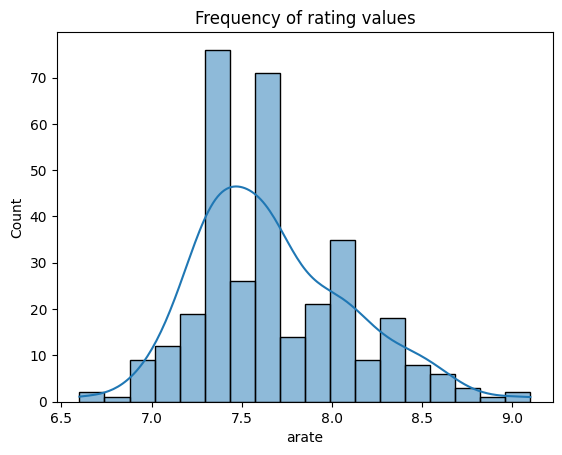

In [144]:
#Visualization 1

p = sns.histplot(data = df, x="arate", kde = True).set_title("Frequency of rating values")


#Your observations

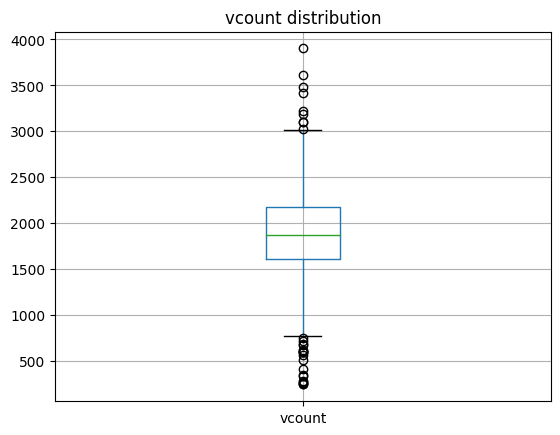

In [145]:
#Visualization 2

p = df.boxplot(column=['vcount']).set_title("vcount distribution")
#Your observations

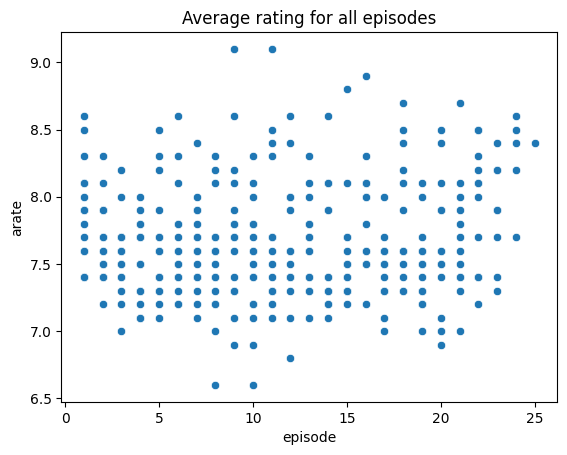

In [146]:
#Visualization 3

y =sns.scatterplot(data=df, x="episode", y="arate").set_title("Average rating for all episodes")

#Your observations

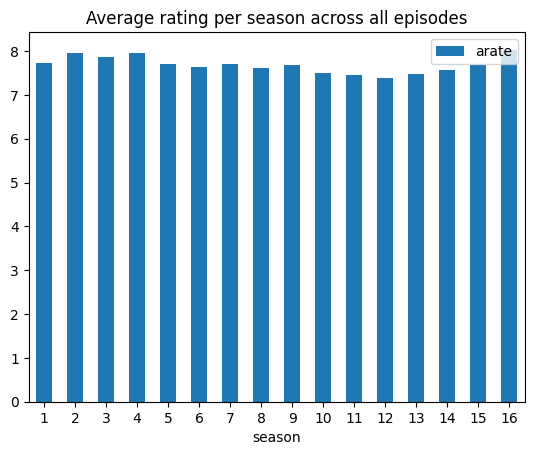

In [147]:
#Visualization 4

df.columns
p = df.groupby("season")["arate"].agg("mean").to_frame()
p['season'] = p.index
z =p.plot.bar(x='season', y='arate', rot=0, title = "Average rating per season across all episodes")
#Your observations

Text(0, 0.5, 'average rating')

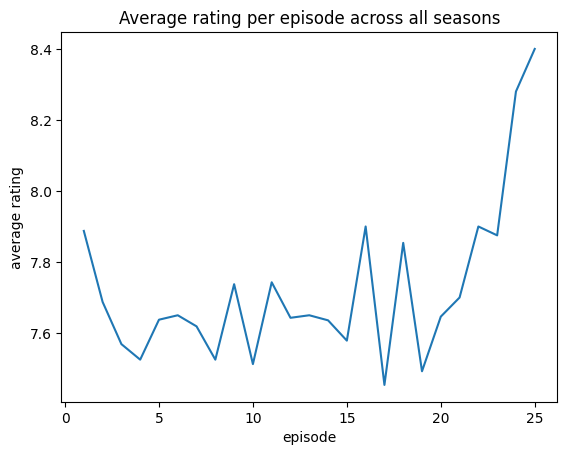

In [148]:
#Visualization 5
df.columns
j = df.groupby("episode")["arate"].agg("mean")
z = j.plot.line(title = "Average rating per episode across all seasons")
z.set_ylabel("average rating")
#Your observations

### Which visualization is the best for your dataset and why?

In [149]:
#The best visualization for my dataset is the historgram because it displays the distribution of the ratings that were given. Here, we see that the rating primarily ranged from 7-9, 
# and were highest at 7.4/7.6. However, my line graph displayed an interesting fact: as the season contintued, the last episodes rating much higher than the earlier episodes. 

# Good job!

### As a quick wrap-up, think about how your biases might have affected your judgement and if there is anything you want to work on. 

### As you can see, working with a dataset outside of class is much less structured. However, with practice, you will be become much sharper and efficient at wrangling data. Good luck with the next project!

In [150]:
#The ratings given in this dataset were only from 7-9, so I had assumed that they meant on a scale from one to 10. This preconception bias that I had may have been incorrect, 
# and if so, could have resulted in a misinterpretation of the data. 7 could have been a better rating than 8, but that would have been lost under my line of logic. 
# The data that I found is also interesting because it displays a pattern in audience enjoyment, which can help production of TV shows and movies. Since people like the last 
# episodes of seasons for Criminal Minds, the production team can focus on adding more suspense towards those episodes to gain maximum viewership. 

### Fantastic job ~ Remember to push all your changes your GitHub repository and submit on Gradescope.
### Thank you for your time :)
### That's all for this homework! 